In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
from sklearn.preprocessing import StandardScaler

In [11]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import datetime
import statsmodels.api as sm

In [64]:
df=pd.read_csv('sales-of-shampoo-over-a-three-ye.csv')
df.columns

Index(['Month', 'Sales of shampoo over a three year period'], dtype='object')

In [97]:
series = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', parse_dates=True)
series.head() 

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [98]:
series = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', header=0, parse_dates=True, index_col='Month')
series.head() 

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [99]:
series.columns

Index(['Sales of shampoo over a three year period'], dtype='object')

In [100]:
series.columns

Index(['Sales of shampoo over a three year period'], dtype='object')

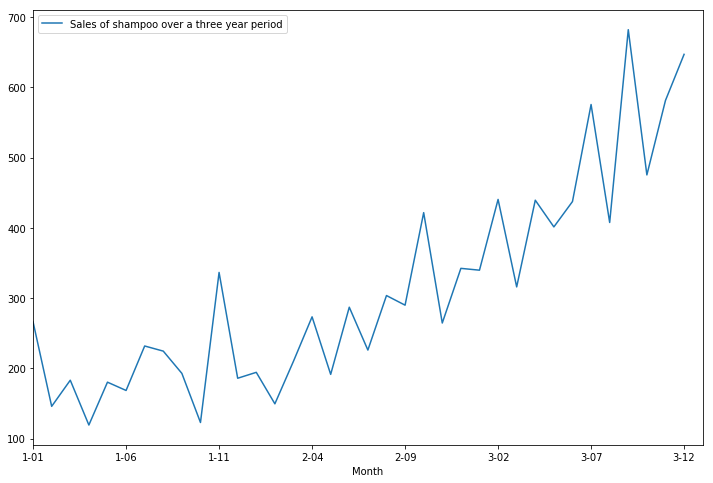

In [101]:
%matplotlib inline
series.plot(figsize=(12,8))

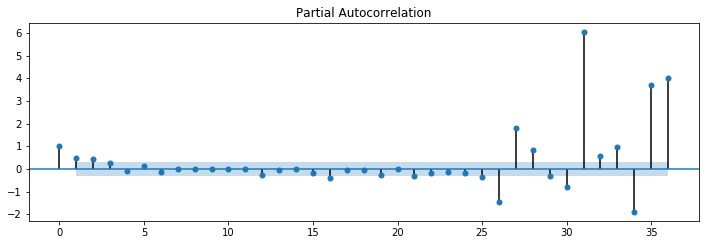

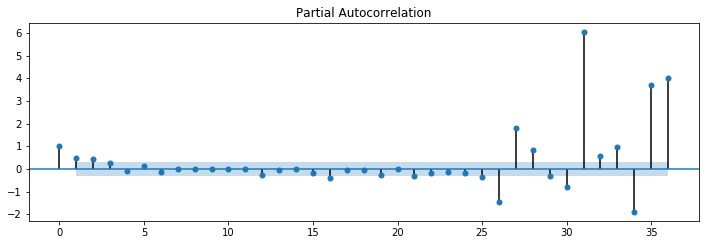

In [112]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_pacf(series, lags=40,ax=ax1)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


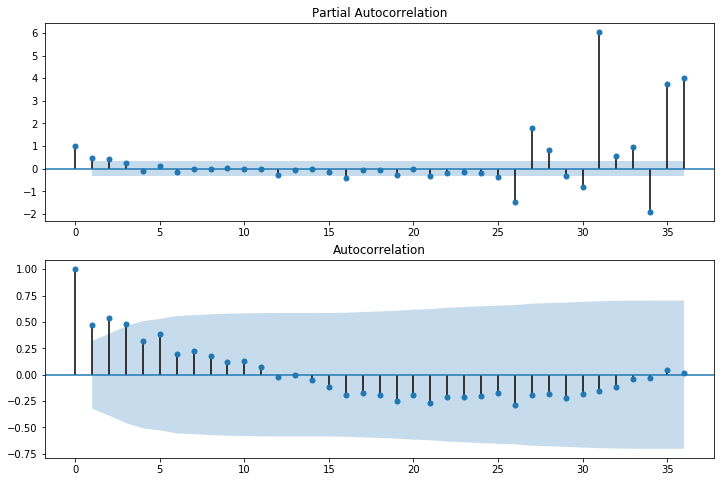

In [114]:
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_acf(series.values.squeeze(),ax=ax2)

In [104]:
series.fillna(0,inplace=True)

In [105]:
model = sm.tsa.ARMA(series, (2,0)).fit()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [106]:
print(model.params)

const                                              293.654391
ar.L1.Sales of shampoo over a three year period      0.123110
ar.L2.Sales of shampoo over a three year period      0.597071
dtype: float64


In [107]:
print(model.aic, model.bic, model.hqic)

467.37888370245383 473.82255535303074 469.65057977808846


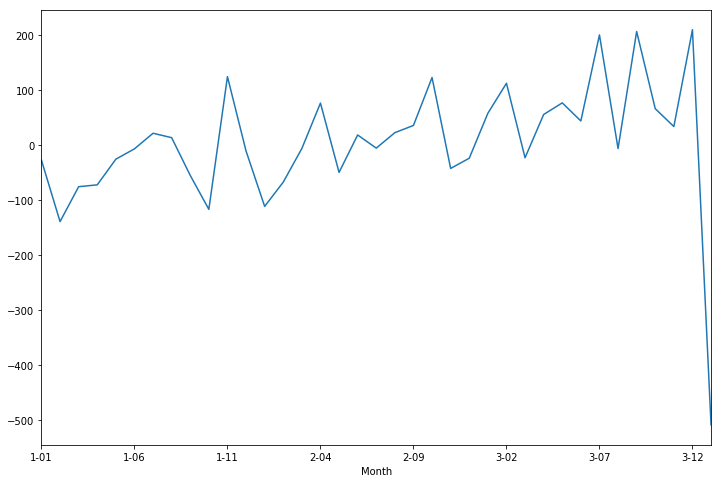

In [108]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = model.resid.plot()

In [109]:
from scipy import stats
resid20 = model.resid
stats.normaltest(resid20)

NormaltestResult(statistic=30.3426922269355, pvalue=2.5773185518860467e-07)

In [82]:
from statsmodels.graphics.api import qqplot

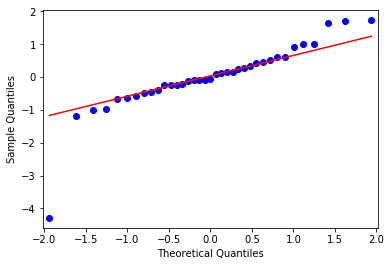

<Figure size 864x576 with 0 Axes>

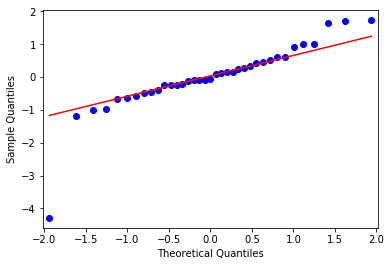

In [83]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
qqplot(resid20, line='q', fit=True)

In [84]:
predict= model.predict(dynamic=True)

In [85]:
predict

Month
1-03                                         258.952691
1-04                                         201.162419
1-05                                         261.548314
1-06                                         234.477546
1-07                                         267.199517
1-08                                         255.064757
1-09                                         273.108180
1-10                                         268.084198
1-11                                         278.238896
1-12                                         276.489370
2-01                                         282.337060
2-02                                         282.012379
2-03                                         285.463892
2-04                                         285.694951
2-05                                         287.784195
2-06                                         288.179361
2-07                                         289.475436
2-08                                      

In [46]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()
def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat))

In [120]:
print("MFE = ", mean_forecast_err(series['Sales of shampoo over a three year period'], predict))
print("MAE = ", mean_absolute_err(series['Sales of shampoo over a three year period'], predict))

MFE =  28.633782608749378
MAE =  0.10244776831362305


In [128]:
output = model.forecast()
yhat = output[0]

AttributeError: 'ARIMA' object has no attribute 'forecast'

In [129]:
series.index

Index(['1-01', '1-02', '1-03', '1-04', '1-05', '1-06', '1-07', '1-08', '1-09',
       '1-10', '1-11', '1-12', '2-01', '2-02', '2-03', '2-04', '2-05', '2-06',
       '2-07', '2-08', '2-09', '2-10', '2-11', '2-12', '3-01', '3-02', '3-03',
       '3-04', '3-05', '3-06', '3-07', '3-08', '3-09', '3-10', '3-11', '3-12',
       'Sales of shampoo over a three year period'],
      dtype='object', name='Month')